In [27]:
from pathlib import Path
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

,Unnamed: 0,ID,sum across game,Average score,std avg score,Max score,Min score,Min level,Max level,Average level,Matches played
0,0,A112930031,4151,2075.500000,1237.500000,3313,838,1,3,2.000000,2
1,1,A103030031,6899,2299.666667,2669.444678,6066,193,0,2,1.000000,3
2,2,A113030031,4608,2304.000000,2145.000000,4449,159,0,3,1.500000,2
3,3,A133030031,1841,368.200000,336.627628,969,79,0,1,0.200000,5
4,4,B103030032,1135,283.750000,105.684377,438,180,0,0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...
77,77,B102230042,719,719.000000,0.000000,719,719,1,1,1.000000,1
78,78,B122230042,350,87.500000,62.291653,182,14,0,0,0.000000,4
79,79,B142230042,16095,16095.000000,0.000000,16095,16095,7,7,7.000000,1
80,80,A191230051,11275,11275.000000,0.000000,11275,11275,6,6,6.000000,1


In [49]:
scores = pd.read_csv("test_scores_tetris.csv")
scores

,Unnamed: 0,ID,sum across game,Average score,std avg score,Max score,Min score,Min level,Max level,Average level,Matches played
0,0,A112930031,4151,2075.500000,1237.500000,3313,838,1,3,2.000000,2
1,1,A103030031,6899,2299.666667,2669.444678,6066,193,0,2,1.000000,3
2,2,A113030031,4608,2304.000000,2145.000000,4449,159,0,3,1.500000,2
3,3,A133030031,1841,368.200000,336.627628,969,79,0,1,0.200000,5
4,4,B103030032,1135,283.750000,105.684377,438,180,0,0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...
77,77,B102230042,719,719.000000,0.000000,719,719,1,1,1.000000,1
78,78,B122230042,350,87.500000,62.291653,182,14,0,0,0.000000,4
79,79,B142230042,16095,16095.000000,0.000000,16095,16095,7,7,7.000000,1
80,80,A191230051,11275,11275.000000,0.000000,11275,11275,6,6,6.000000,1


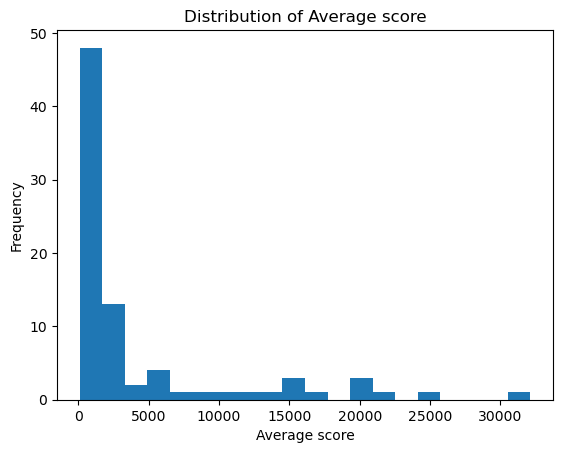

Summary statistics for Average score: 

count       82.000000
mean      4203.282114
std       6798.231423
min         84.750000
25%        460.687500
50%        996.250000
75%       3414.250000
max      32141.000000
Name: Average score, dtype: float64


In [28]:
# Check distribution of Averge score
column_name = "Average score"
column_values = scores[column_name]

plt.hist(column_values, bins=20)
plt.title("Distribution of {}".format(column_name))
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.show()

print("Summary statistics for {}: \n".format(column_name))
print(column_values.describe())

In [29]:
# Logaritmic transformation 
target_variable = scores['Average score']

log_transformed_target = np.log(target_variable)
scores['Average score (log)'] = log_transformed_target

scores.to_csv('scores_log_transformed.csv', index=False)

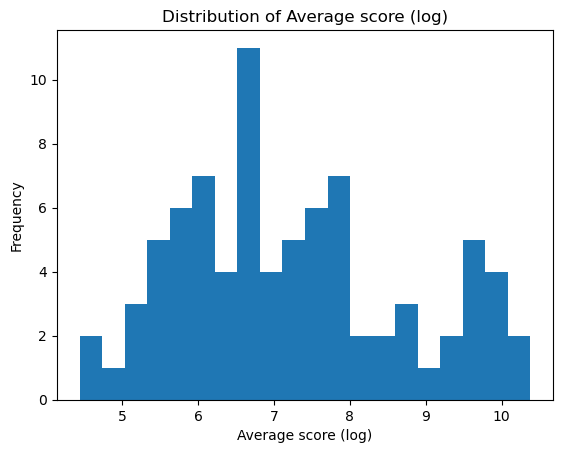

Summary statistics for Average score (log): 

count    82.000000
mean      7.236983
std       1.500350
min       4.439706
25%       6.132432
50%       6.903889
75%       8.131525
max      10.377888
Name: Average score (log), dtype: float64


In [30]:
# Plot Average score (log)
column_name = "Average score (log)"
column_values = scores[column_name]

plt.hist(column_values, bins=20)
plt.title("Distribution of {}".format(column_name))
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.show()

print("Summary statistics for {}: \n".format(column_name))
print(column_values.describe())

In [34]:
# Mr. Guglielmo has given me permission to use his code.  
lista = list() #list initialization to get file names
basepath = Path("/Users/peterhendriks/Desktop/thesis/tetris AUs faces(full game)") 
files_in_basepath = (entry for entry in basepath.iterdir() if entry.is_file())
for item in files_in_basepath:
    if item != ".DS_Store":
        lista.append(item.name)

In [35]:
# Mr. Guglielmo has given me permission to use his code.  
Dataset = pd.DataFrame()

means = list()
AUs = ["01", "02", "04", "05", "06", "07", "09", "10","12", "14", "15", "17", "20", "23", "25", "26", "45"]
for i in lista[:]:
    try:
        data = pd.read_csv("/Users/peterhendriks/Desktop/thesis/tetris AUs faces(full game)/"+str(i))
        means = list()
        for k in AUs:
            sub = np.mean(data.loc[:23400, " AU"+k+"_r"])
            means.append(sub)
        new_row = {"ID": str(i[:10]) ,"mean AU"+str(AUs[0]): means[0], "mean AU"+str(AUs[1]): means[1] , "mean AU"+str(AUs[2]): means[2], "mean AU"+str(AUs[3]): means[3] , 
                  "mean AU"+str(AUs[4]): means[4], "mean AU"+str(AUs[5]): means[5], "mean AU"+str(AUs[6]): means[6], "mean AU"+str(AUs[7]): means[7], "mean AU"+str(AUs[8]): means[8], 
                  "mean AU"+str(AUs[9]): means[9] , "mean AU"+str(AUs[10]): means[10], "mean AU"+str(AUs[11]): means[11] , "mean AU"+str(AUs[12]): means[12], "mean AU"+str(AUs[13]): means[13],
                  "mean AU"+str(AUs[14]): means[14], "mean AU"+str(AUs[15]): means[15], "mean AU"+str(AUs[16]): means[16]}
        Dataset = Dataset.append(new_row, ignore_index = True)
    except:
        pass

/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Dataset = Dataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/490793994.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versi

In [36]:
Dataset

,ID,mean AU01,mean AU02,mean AU04,mean AU05,mean AU06,mean AU07,mean AU09,mean AU10,mean AU12,mean AU14,mean AU15,mean AU17,mean AU20,mean AU23,mean AU25,mean AU26,mean AU45
0,B120630042,0.147313,0.108012,0.041444,0.032526,0.000537,0.000313,0.026792,0.578697,0.002312,0.780641,0.085622,0.221157,0.089548,0.084434,0.240949,0.203195,0.124574
1,B111130042,0.095349,0.057137,0.200535,0.036078,0.019433,0.190994,0.039894,0.003384,0.060468,0.124583,0.099257,0.300537,0.075390,0.113183,0.166348,0.194419,0.147904
2,B111430042,0.116886,0.047124,0.138423,0.056864,0.008100,0.010603,0.057342,0.025396,0.020132,0.033322,0.202523,0.344639,0.125895,0.167552,0.386860,0.315485,0.195279
3,A111430041,0.097707,0.046729,0.087650,0.037726,0.011213,0.710855,0.041736,0.006701,0.005756,0.066968,0.075638,0.193054,0.056574,0.066551,0.161336,0.225522,0.223539
4,B142230042,0.262322,0.075181,0.221549,0.071714,0.036145,0.086433,0.057345,0.013484,0.043273,0.312287,0.118088,0.930258,0.175339,0.148285,0.376776,0.349618,0.204150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,B132130042,0.344208,0.179783,0.391067,0.128221,0.083499,0.371030,0.178077,0.214543,0.062581,0.188254,0.195792,0.732977,0.100486,0.472131,0.272790,0.670651,0.186516
74,A100130041,0.164386,0.107102,0.057032,0.052813,0.001822,0.007147,0.056223,0.008655,0.386616,0.922089,0.107259,0.881322,0.119004,0.201704,0.267137,0.599506,0.202966
75,A103030031,0.112284,0.060485,0.983582,0.058500,0.000235,0.028122,0.047488,0.947385,0.279781,1.162181,0.169144,0.344959,0.152710,0.157786,0.321730,0.293481,0.152814
76,B131930042,0.092076,0.058473,1.093563,0.058507,0.024536,0.045903,0.035691,0.195050,0.108768,0.166006,0.101885,0.302220,0.100519,0.096336,0.197409,0.249856,0.154053


In [37]:
Meandata = pd.merge(Dataset, scores[["ID","Average score (log)"]], on = "ID")
Meandata

,ID,mean AU01,mean AU02,mean AU04,mean AU05,mean AU06,mean AU07,mean AU09,mean AU10,mean AU12,mean AU14,mean AU15,mean AU17,mean AU20,mean AU23,mean AU25,mean AU26,mean AU45,Average score (log)
0,B120630042,0.147313,0.108012,0.041444,0.032526,0.000537,0.000313,0.026792,0.578697,0.002312,0.780641,0.085622,0.221157,0.089548,0.084434,0.240949,0.203195,0.124574,8.657651
1,B111130042,0.095349,0.057137,0.200535,0.036078,0.019433,0.190994,0.039894,0.003384,0.060468,0.124583,0.099257,0.300537,0.075390,0.113183,0.166348,0.194419,0.147904,10.377888
2,B111430042,0.116886,0.047124,0.138423,0.056864,0.008100,0.010603,0.057342,0.025396,0.020132,0.033322,0.202523,0.344639,0.125895,0.167552,0.386860,0.315485,0.195279,6.589614
3,A111430041,0.097707,0.046729,0.087650,0.037726,0.011213,0.710855,0.041736,0.006701,0.005756,0.066968,0.075638,0.193054,0.056574,0.066551,0.161336,0.225522,0.223539,6.422435
4,B142230042,0.262322,0.075181,0.221549,0.071714,0.036145,0.086433,0.057345,0.013484,0.043273,0.312287,0.118088,0.930258,0.175339,0.148285,0.376776,0.349618,0.204150,9.686264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,B132130042,0.344208,0.179783,0.391067,0.128221,0.083499,0.371030,0.178077,0.214543,0.062581,0.188254,0.195792,0.732977,0.100486,0.472131,0.272790,0.670651,0.186516,6.118648
74,A100130041,0.164386,0.107102,0.057032,0.052813,0.001822,0.007147,0.056223,0.008655,0.386616,0.922089,0.107259,0.881322,0.119004,0.201704,0.267137,0.599506,0.202966,6.323014
75,A103030031,0.112284,0.060485,0.983582,0.058500,0.000235,0.028122,0.047488,0.947385,0.279781,1.162181,0.169144,0.344959,0.152710,0.157786,0.321730,0.293481,0.152814,7.740519
76,B131930042,0.092076,0.058473,1.093563,0.058507,0.024536,0.045903,0.035691,0.195050,0.108768,0.166006,0.101885,0.302220,0.100519,0.096336,0.197409,0.249856,0.154053,7.862882


In [38]:
sdDataset = pd.DataFrame()

stds = list()
AUs = ["01", "02", "04", "05", "06", "07", "09", "10","12", "14", "15", "17", "20", "23", "25", "26", "45"]
for i in lista[:]:
    try:
        data = pd.read_csv("/Users/peterhendriks/Desktop/thesis/tetris AUs faces(full game)/"+str(i))
        stds = list()
        for k in AUs:
            sub = np.std(data.loc[:23400, " AU"+k+"_r"])
            stds.append(sub)
        new_row = {"ID": str(i[:10]) ,"std AU"+str(AUs[0]): stds[0], "std AU"+str(AUs[1]): stds[1] , "std AU"+str(AUs[2]): stds[2], "std AU"+str(AUs[3]): stds[3] , 
                  "std AU"+str(AUs[4]): stds[4], "std AU"+str(AUs[5]): stds[5], "std AU"+str(AUs[6]): stds[6], "std AU"+str(AUs[7]): stds[7], "std AU"+str(AUs[8]): stds[8], 
                  "std AU"+str(AUs[9]): stds[9] , "std AU"+str(AUs[10]): stds[10], "std AU"+str(AUs[11]): stds[11] , "std AU"+str(AUs[12]): stds[12], "std AU"+str(AUs[13]): stds[13],
                  "std AU"+str(AUs[14]): stds[14], "std AU"+str(AUs[15]): stds[15], "std AU"+str(AUs[16]): stds[16]}
        sdDataset = sdDataset.append(new_row, ignore_index = True)
    except:
        pass


/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdDataset = sdDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdDataset = sdDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdDataset = sdDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdDataset = sdDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdDataset = sdDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdDataset = sdDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdDataset = sdDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdDataset = sdDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sdDataset = sdDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2227001485.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

In [39]:
sdDataset

,ID,std AU01,std AU02,std AU04,std AU05,std AU06,std AU07,std AU09,std AU10,std AU12,std AU14,std AU15,std AU17,std AU20,std AU23,std AU25,std AU26,std AU45
0,B120630042,0.293903,0.285240,0.079149,0.077768,0.012182,0.005957,0.055377,0.182558,0.038538,0.280202,0.143757,0.188029,0.173283,0.164248,0.251555,0.217596,0.247164
1,B111130042,0.158434,0.130234,0.182694,0.094863,0.081446,0.239716,0.121788,0.049121,0.114447,0.253675,0.191415,0.386488,0.135417,0.252566,0.157393,0.234652,0.286158
2,B111430042,0.223553,0.122805,0.155670,0.154861,0.087890,0.069744,0.142916,0.186142,0.167954,0.179801,0.382673,0.338400,0.287241,0.327896,0.387160,0.336335,0.387825
3,A111430041,0.200442,0.177843,0.091831,0.111054,0.051670,0.283810,0.082701,0.032948,0.027858,0.143123,0.118978,0.226816,0.107285,0.146909,0.149742,0.270456,0.453978
4,B142230042,0.382786,0.166640,0.257734,0.201825,0.092962,0.225318,0.117032,0.051256,0.110932,0.369005,0.197478,0.730969,0.307157,0.287910,0.410220,0.350194,0.394817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,B132130042,0.596362,0.393902,0.255505,0.320215,0.204199,0.658396,0.373604,0.513850,0.171783,0.339854,0.364345,0.656894,0.184755,1.003919,0.253813,0.764823,0.365775
74,A100130041,0.329063,0.288979,0.140539,0.130760,0.021204,0.048325,0.125412,0.080909,0.259187,0.487168,0.190635,0.914754,0.228809,0.351742,0.277993,0.683924,0.461133
75,A103030031,0.207332,0.171194,0.235313,0.204513,0.006895,0.099253,0.094469,0.286791,0.167804,0.438132,0.324061,0.376660,0.383410,0.380148,0.322285,0.292145,0.355421
76,B131930042,0.144586,0.125906,0.265518,0.162457,0.142524,0.139702,0.077967,0.170656,0.245959,0.347867,0.184514,0.272664,0.225740,0.216183,0.210998,0.336984,0.276966


In [40]:
sddata = pd.merge(sdDataset, scores[["ID","Average score (log)"]], on = "ID")
sddata

,ID,std AU01,std AU02,std AU04,std AU05,std AU06,std AU07,std AU09,std AU10,std AU12,std AU14,std AU15,std AU17,std AU20,std AU23,std AU25,std AU26,std AU45,Average score (log)
0,B120630042,0.293903,0.285240,0.079149,0.077768,0.012182,0.005957,0.055377,0.182558,0.038538,0.280202,0.143757,0.188029,0.173283,0.164248,0.251555,0.217596,0.247164,8.657651
1,B111130042,0.158434,0.130234,0.182694,0.094863,0.081446,0.239716,0.121788,0.049121,0.114447,0.253675,0.191415,0.386488,0.135417,0.252566,0.157393,0.234652,0.286158,10.377888
2,B111430042,0.223553,0.122805,0.155670,0.154861,0.087890,0.069744,0.142916,0.186142,0.167954,0.179801,0.382673,0.338400,0.287241,0.327896,0.387160,0.336335,0.387825,6.589614
3,A111430041,0.200442,0.177843,0.091831,0.111054,0.051670,0.283810,0.082701,0.032948,0.027858,0.143123,0.118978,0.226816,0.107285,0.146909,0.149742,0.270456,0.453978,6.422435
4,B142230042,0.382786,0.166640,0.257734,0.201825,0.092962,0.225318,0.117032,0.051256,0.110932,0.369005,0.197478,0.730969,0.307157,0.287910,0.410220,0.350194,0.394817,9.686264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,B132130042,0.596362,0.393902,0.255505,0.320215,0.204199,0.658396,0.373604,0.513850,0.171783,0.339854,0.364345,0.656894,0.184755,1.003919,0.253813,0.764823,0.365775,6.118648
74,A100130041,0.329063,0.288979,0.140539,0.130760,0.021204,0.048325,0.125412,0.080909,0.259187,0.487168,0.190635,0.914754,0.228809,0.351742,0.277993,0.683924,0.461133,6.323014
75,A103030031,0.207332,0.171194,0.235313,0.204513,0.006895,0.099253,0.094469,0.286791,0.167804,0.438132,0.324061,0.376660,0.383410,0.380148,0.322285,0.292145,0.355421,7.740519
76,B131930042,0.144586,0.125906,0.265518,0.162457,0.142524,0.139702,0.077967,0.170656,0.245959,0.347867,0.184514,0.272664,0.225740,0.216183,0.210998,0.336984,0.276966,7.862882


In [41]:
medDataset = pd.DataFrame()

medians = list()
AUs = ["01", "02", "04", "05", "06", "07", "09", "10","12", "14", "15", "17", "20", "23", "25", "26", "45"]
for i in lista[:]:
    try:
        data = pd.read_csv("/Users/peterhendriks/Desktop/thesis/tetris AUs faces(full game)/"+str(i))
        medians = list()
        for k in AUs:
            sub = np.median(data.loc[:23400, " AU"+k+"_r"])
            medians.append(sub)
        new_row = {"ID": str(i[:10]) ,"median AU"+str(AUs[0]): medians[0], "median AU"+str(AUs[1]): medians[1] , "median AU"+str(AUs[2]): medians[2], "median AU"+str(AUs[3]): medians[3] , 
                  "median AU"+str(AUs[4]): medians[4], "median AU"+str(AUs[5]): medians[5], "median AU"+str(AUs[6]): medians[6], "median AU"+str(AUs[7]): medians[7], "median AU"+str(AUs[8]): medians[8], 
                  "median AU"+str(AUs[9]): medians[9] , "median AU"+str(AUs[10]): medians[10], "median AU"+str(AUs[11]): medians[11] , "median AU"+str(AUs[12]): medians[12], "median AU"+str(AUs[13]): medians[13],
                  "median AU"+str(AUs[14]): medians[14], "median AU"+str(AUs[15]): medians[15], "median AU"+str(AUs[16]): medians[16]}
        medDataset = medDataset.append(new_row, ignore_index = True)
    except:
        pass


/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medDataset = medDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medDataset = medDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medDataset = medDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas

/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medDataset = medDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medDataset = medDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medDataset = medDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas

/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medDataset = medDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medDataset = medDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  medDataset = medDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/858713077.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas

In [42]:
medDataset

,ID,median AU01,median AU02,median AU04,median AU05,median AU06,median AU07,median AU09,median AU10,median AU12,median AU14,median AU15,median AU17,median AU20,median AU23,median AU25,median AU26,median AU45
0,B120630042,0.01,0.0,0.00,0.0,0.00,0.00,0.0,0.58,0.00,0.81,0.01,0.19,0.0,0.0,0.17,0.14,0.00
1,B111130042,0.01,0.0,0.17,0.0,0.00,0.11,0.0,0.00,0.01,0.00,0.02,0.20,0.0,0.0,0.14,0.13,0.00
2,B111430042,0.01,0.0,0.09,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.01,0.28,0.0,0.0,0.34,0.24,0.00
3,A111430041,0.01,0.0,0.06,0.0,0.00,0.70,0.0,0.00,0.00,0.00,0.01,0.15,0.0,0.0,0.14,0.13,0.00
4,B142230042,0.00,0.0,0.12,0.0,0.00,0.00,0.0,0.00,0.00,0.16,0.01,0.98,0.0,0.0,0.30,0.27,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,B132130042,0.01,0.0,0.40,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.01,0.65,0.0,0.0,0.25,0.51,0.00
74,A100130041,0.01,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.38,0.83,0.02,0.56,0.0,0.0,0.22,0.31,0.00
75,A103030031,0.01,0.0,1.00,0.0,0.00,0.00,0.0,0.98,0.27,1.11,0.01,0.25,0.0,0.0,0.26,0.23,0.00
76,B131930042,0.01,0.0,1.11,0.0,0.00,0.00,0.0,0.17,0.03,0.04,0.02,0.26,0.0,0.0,0.13,0.15,0.00


In [43]:
skDataset = pd.DataFrame()

skews = list()
AUs = ["01", "02", "04", "05", "06", "07", "09", "10","12", "14", "15", "17", "20", "23", "25", "26", "45"]
for i in lista[:]:
    try:
        data = pd.read_csv("/Users/peterhendriks/Desktop/thesis/tetris AUs faces(full game)/"+str(i))
        skews = list()
        for k in AUs:
            sub = data.loc[:23400, " AU"+k+"_r"].skew()
            skews.append(sub)
        new_row = {"ID": str(i[:10]) ,"skew AU"+str(AUs[0]): skews[0], "skew AU"+str(AUs[1]): skews[1] , "skew AU"+str(AUs[2]): skews[2], "skew AU"+str(AUs[3]): skews[3] , 
                  "skew AU"+str(AUs[4]): skews[4], "skew AU"+str(AUs[5]): skews[5], "skew AU"+str(AUs[6]): skews[6], "skew AU"+str(AUs[7]): skews[7], "skew AU"+str(AUs[8]): skews[8], 
                  "skew AU"+str(AUs[9]): skews[9] , "skew AU"+str(AUs[10]): skews[10], "skew AU"+str(AUs[11]): skews[11] , "skew AU"+str(AUs[12]): skews[12], "skew AU"+str(AUs[13]): skews[13],
                  "skew AU"+str(AUs[14]): skews[14], "skew AU"+str(AUs[15]): skews[15], "skew AU"+str(AUs[16]): skews[16]}
        skDataset = skDataset.append(new_row, ignore_index = True)
    except:
        pass


/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skDataset = skDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skDataset = skDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skDataset = skDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skDataset = skDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skDataset = skDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skDataset = skDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skDataset = skDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skDataset = skDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skDataset = skDataset.append(new_row, ignore_index = True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/2622479819.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas i

In [44]:
skDataset

,ID,skew AU01,skew AU02,skew AU04,skew AU05,skew AU06,skew AU07,skew AU09,skew AU10,skew AU12,skew AU14,skew AU15,skew AU17,skew AU20,skew AU23,skew AU25,skew AU26,skew AU45
0,B120630042,3.209543,3.756421,2.684747,3.253009,27.030768,26.668817,4.804686,-0.014889,21.028401,-0.552401,2.602314,0.788563,3.206776,2.216128,1.131130,1.489302,3.591225
1,B111130042,2.489342,3.382728,1.416800,4.157032,7.849479,2.371442,10.271235,26.148665,3.542060,2.810359,4.056394,3.020083,2.421787,3.173103,0.899286,2.381516,3.083540
2,B111430042,5.188601,10.752804,1.381835,4.954000,13.513164,10.410715,4.101070,9.293272,10.545935,7.328324,3.449669,1.965166,3.481097,2.679247,1.427703,1.508182,3.256221
3,A111430041,5.081161,15.588611,1.115494,7.810060,6.290679,0.491104,2.713242,12.314747,10.373061,3.109924,3.288610,5.142615,3.474290,4.469912,0.783465,2.375760,2.827620
4,B142230042,1.222932,2.791396,1.312790,3.982826,3.563826,3.507190,2.549200,5.748389,3.246683,1.086065,3.086480,0.181759,1.903743,2.599976,2.175415,1.007558,2.881162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,B132130042,1.752627,2.328479,0.214063,2.974264,2.272338,1.919489,2.252592,3.480117,3.072750,2.177616,4.050892,1.223786,2.340111,2.126770,0.979209,1.450163,3.113573
74,A100130041,3.354903,4.148951,3.373452,3.255436,26.451526,16.343967,3.875471,13.977459,0.300438,0.563787,4.362382,0.994540,2.593022,1.756711,1.832030,1.001435,3.958866
75,A103030031,3.047528,5.569446,-0.464092,5.955135,36.360106,6.252524,3.322169,-1.071955,0.891709,1.282123,3.160480,1.976141,4.145757,3.911422,1.138568,1.511771,3.670136
76,B131930042,1.924943,2.752339,-0.344315,3.866780,9.015597,4.625897,3.302154,1.131328,5.473553,4.195648,3.530823,1.435626,3.743413,3.443510,1.246437,2.771257,2.712357


In [45]:
range_dataset = pd.DataFrame()
ranges = list()
AUs = ["01", "02", "04", "05", "06", "07", "09", "10", "12", "14", "15", "17", "20", "23", "25", "26", "45"]
for i in lista[:]:
    try:
        data = pd.read_csv("/Users/peterhendriks/Desktop/thesis/tetris AUs faces(full game)/" + str(i))
        ranges = list()
        for k in AUs:
            sub_range = np.ptp(data.loc[:23400, " AU" + k + "_r"])
            ranges.append(sub_range)
        new_row = {
            "ID": str(i[:10]), 
            "range AU" + str(AUs[0]): ranges[0], 
            "range AU" + str(AUs[1]): ranges[1], 
            "range AU" + str(AUs[2]): ranges[2], 
            "range AU" + str(AUs[3]): ranges[3], 
            "range AU" + str(AUs[4]): ranges[4], 
            "range AU" + str(AUs[5]): ranges[5], 
            "range AU" + str(AUs[6]): ranges[6], 
            "range AU" + str(AUs[7]): ranges[7], 
            "range AU" + str(AUs[8]): ranges[8], 
            "range AU" + str(AUs[9]): ranges[9], 
            "range AU" + str(AUs[10]): ranges[10], 
            "range AU" + str(AUs[11]): ranges[11], 
            "range AU" + str(AUs[12]): ranges[12], 
            "range AU" + str(AUs[13]): ranges[13], 
            "range AU" + str(AUs[14]): ranges[14], 
            "range AU" + str(AUs[15]): ranges[15], 
            "range AU" + str(AUs[16]): ranges[16]
        }
        range_dataset = range_dataset.append(new_row, ignore_index=True)
    except:
        pass


/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  range_dataset = range_dataset.append(new_row, ignore_index=True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  range_dataset = range_dataset.append(new_row, ignore_index=True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  range_dataset = range_dataset.append(new_row, ignore_index=True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  range_dataset = range_dataset.append(new_row, ignore_index=True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  range_dataset = range_dataset.append(new_row, ignore_index=True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  range_dataset = range_dataset.append(new_row, ignore_index=True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  range_dataset = range_dataset.append(new_row, ignore_index=True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  range_dataset = range_dataset.append(new_row, ignore_index=True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  range_dataset = range_dataset.append(new_row, ignore_index=True)
/var/folders/r4/bv87gz7x21z7161hf94jy4bh0000gn/T/ipykernel_33279/3367875075.py:31: FutureWarning: The frame.append method is deprecated and will be rem

In [46]:
range_dataset

,ID,range AU01,range AU02,range AU04,range AU05,range AU06,range AU07,range AU09,range AU10,range AU12,range AU14,range AU15,range AU17,range AU20,range AU23,range AU25,range AU26,range AU45
0,B120630042,2.76,2.77,0.78,0.74,0.42,0.27,1.23,1.75,1.08,1.89,1.29,1.09,2.09,1.09,1.53,1.64,2.64
1,B111130042,1.28,1.50,2.06,1.19,1.90,3.06,2.71,2.58,1.71,1.84,2.82,4.69,1.04,3.01,1.54,2.54,2.65
2,B111430042,4.77,3.90,1.12,3.11,1.88,1.62,2.73,2.72,2.75,2.47,4.84,3.73,2.55,3.49,3.02,3.78,3.32
3,A111430041,3.60,4.76,0.54,2.65,0.62,2.15,1.01,0.84,0.65,1.64,1.63,3.38,1.28,1.68,1.24,2.62,3.21
4,B142230042,1.89,1.19,1.28,1.92,0.94,2.06,0.89,0.79,1.18,1.83,2.32,2.80,2.42,2.61,4.44,1.89,3.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,B132130042,2.93,2.25,1.41,2.90,0.92,3.35,2.15,3.42,1.16,2.34,4.96,3.35,1.34,4.41,2.82,3.43,3.24
74,A100130041,3.02,2.93,1.25,1.11,1.24,2.08,2.24,2.46,1.99,2.46,3.90,3.90,1.97,1.70,2.85,3.42,4.62
75,A103030031,2.50,3.06,2.56,2.85,0.37,2.08,1.71,1.95,1.26,4.19,3.88,3.72,3.76,5.00,2.89,4.33,3.47
76,B131930042,1.20,1.45,1.97,1.48,2.34,1.84,0.77,1.79,2.88,3.23,1.73,2.36,1.99,2.14,2.13,2.86,2.70


In [47]:
data = pd.merge(sdDataset, medDataset, on=["ID"], suffixes=("_sd", "_med"))
data = pd.merge(data, skDataset, on=["ID"])
data = pd.merge(data, range_dataset, on=["ID"])
data = pd.merge(data, Dataset, on=["ID"])
data = pd.merge(data, scores[["ID", "Average score (log)"]], on=["ID"])
data


,ID,std AU01,std AU02,std AU04,std AU05,std AU06,std AU07,std AU09,std AU10,std AU12,...,mean AU12,mean AU14,mean AU15,mean AU17,mean AU20,mean AU23,mean AU25,mean AU26,mean AU45,Average score (log)
0,B120630042,0.293903,0.285240,0.079149,0.077768,0.012182,0.005957,0.055377,0.182558,0.038538,...,0.002312,0.780641,0.085622,0.221157,0.089548,0.084434,0.240949,0.203195,0.124574,8.657651
1,B111130042,0.158434,0.130234,0.182694,0.094863,0.081446,0.239716,0.121788,0.049121,0.114447,...,0.060468,0.124583,0.099257,0.300537,0.075390,0.113183,0.166348,0.194419,0.147904,10.377888
2,B111430042,0.223553,0.122805,0.155670,0.154861,0.087890,0.069744,0.142916,0.186142,0.167954,...,0.020132,0.033322,0.202523,0.344639,0.125895,0.167552,0.386860,0.315485,0.195279,6.589614
3,A111430041,0.200442,0.177843,0.091831,0.111054,0.051670,0.283810,0.082701,0.032948,0.027858,...,0.005756,0.066968,0.075638,0.193054,0.056574,0.066551,0.161336,0.225522,0.223539,6.422435
4,B142230042,0.382786,0.166640,0.257734,0.201825,0.092962,0.225318,0.117032,0.051256,0.110932,...,0.043273,0.312287,0.118088,0.930258,0.175339,0.148285,0.376776,0.349618,0.204150,9.686264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,B132130042,0.596362,0.393902,0.255505,0.320215,0.204199,0.658396,0.373604,0.513850,0.171783,...,0.062581,0.188254,0.195792,0.732977,0.100486,0.472131,0.272790,0.670651,0.186516,6.118648
74,A100130041,0.329063,0.288979,0.140539,0.130760,0.021204,0.048325,0.125412,0.080909,0.259187,...,0.386616,0.922089,0.107259,0.881322,0.119004,0.201704,0.267137,0.599506,0.202966,6.323014
75,A103030031,0.207332,0.171194,0.235313,0.204513,0.006895,0.099253,0.094469,0.286791,0.167804,...,0.279781,1.162181,0.169144,0.344959,0.152710,0.157786,0.321730,0.293481,0.152814,7.740519
76,B131930042,0.144586,0.125906,0.265518,0.162457,0.142524,0.139702,0.077967,0.170656,0.245959,...,0.108768,0.166006,0.101885,0.302220,0.100519,0.096336,0.197409,0.249856,0.154053,7.862882


In [74]:
data1 = data.iloc[:, 1:]

In [75]:
data1 = pd.read_csv('data1.csv')
data1

,std AU01,std AU02,std AU04,std AU05,std AU06,std AU07,std AU09,std AU10,std AU12,std AU14,...,mean AU12,mean AU14,mean AU15,mean AU17,mean AU20,mean AU23,mean AU25,mean AU26,mean AU45,Average score (log)
0,0.293903,0.285240,0.079149,0.077768,0.012182,0.005957,0.055377,0.182558,0.038538,0.280202,...,0.002312,0.780641,0.085622,0.221157,0.089548,0.084434,0.240949,0.203195,0.124574,8.657651
1,0.158434,0.130234,0.182694,0.094863,0.081446,0.239716,0.121788,0.049121,0.114447,0.253675,...,0.060468,0.124583,0.099257,0.300537,0.075390,0.113183,0.166348,0.194419,0.147904,10.377888
2,0.223553,0.122805,0.155670,0.154861,0.087890,0.069744,0.142916,0.186142,0.167954,0.179801,...,0.020132,0.033322,0.202523,0.344639,0.125895,0.167552,0.386860,0.315485,0.195279,6.589614
3,0.200442,0.177843,0.091831,0.111054,0.051670,0.283810,0.082701,0.032948,0.027858,0.143123,...,0.005756,0.066968,0.075638,0.193054,0.056574,0.066551,0.161336,0.225522,0.223539,6.422435
4,0.382786,0.166640,0.257734,0.201825,0.092962,0.225318,0.117032,0.051256,0.110932,0.369005,...,0.043273,0.312287,0.118088,0.930258,0.175339,0.148285,0.376776,0.349618,0.204150,9.686264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.596362,0.393902,0.255505,0.320215,0.204199,0.658396,0.373604,0.513850,0.171783,0.339854,...,0.062581,0.188254,0.195792,0.732977,0.100486,0.472131,0.272790,0.670651,0.186516,6.118648
74,0.329063,0.288979,0.140539,0.130760,0.021204,0.048325,0.125412,0.080909,0.259187,0.487168,...,0.386616,0.922089,0.107259,0.881322,0.119004,0.201704,0.267137,0.599506,0.202966,6.323014
75,0.207332,0.171194,0.235313,0.204513,0.006895,0.099253,0.094469,0.286791,0.167804,0.438132,...,0.279781,1.162181,0.169144,0.344959,0.152710,0.157786,0.321730,0.293481,0.152814,7.740519
76,0.144586,0.125906,0.265518,0.162457,0.142524,0.139702,0.077967,0.170656,0.245959,0.347867,...,0.108768,0.166006,0.101885,0.302220,0.100519,0.096336,0.197409,0.249856,0.154053,7.862882


In [76]:
# Create a new dataset with all columns from data1
data_class = data1.copy()

# Update the values in the "Average score (log)" column based on the specified conditions
data_class.loc[data_class['Average score (log)'] < 6.132432, 'Average score (log)'] = 1
data_class.loc[(data_class['Average score (log)'] >= 6.132432) & (data_class['Average score (log)'] < 8.131525), 'Average score (log)'] = 2
data_class.loc[data_class['Average score (log)'] >= 8.131525, 'Average score (log)'] = 3

# Save the updated dataset to a new file
data_class.to_csv('data_class.csv', index=False)

In [69]:
data_class

,std AU01,std AU02,std AU04,std AU05,std AU06,std AU07,std AU09,std AU10,std AU12,std AU14,...,mean AU12,mean AU14,mean AU15,mean AU17,mean AU20,mean AU23,mean AU25,mean AU26,mean AU45,Average score (log)
0,0.293903,0.285240,0.079149,0.077768,0.012182,0.005957,0.055377,0.182558,0.038538,0.280202,...,0.002312,0.780641,0.085622,0.221157,0.089548,0.084434,0.240949,0.203195,0.124574,3.0
1,0.158434,0.130234,0.182694,0.094863,0.081446,0.239716,0.121788,0.049121,0.114447,0.253675,...,0.060468,0.124583,0.099257,0.300537,0.075390,0.113183,0.166348,0.194419,0.147904,3.0
2,0.223553,0.122805,0.155670,0.154861,0.087890,0.069744,0.142916,0.186142,0.167954,0.179801,...,0.020132,0.033322,0.202523,0.344639,0.125895,0.167552,0.386860,0.315485,0.195279,2.0
3,0.200442,0.177843,0.091831,0.111054,0.051670,0.283810,0.082701,0.032948,0.027858,0.143123,...,0.005756,0.066968,0.075638,0.193054,0.056574,0.066551,0.161336,0.225522,0.223539,2.0
4,0.382786,0.166640,0.257734,0.201825,0.092962,0.225318,0.117032,0.051256,0.110932,0.369005,...,0.043273,0.312287,0.118088,0.930258,0.175339,0.148285,0.376776,0.349618,0.204150,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.596362,0.393902,0.255505,0.320215,0.204199,0.658396,0.373604,0.513850,0.171783,0.339854,...,0.062581,0.188254,0.195792,0.732977,0.100486,0.472131,0.272790,0.670651,0.186516,1.0
74,0.329063,0.288979,0.140539,0.130760,0.021204,0.048325,0.125412,0.080909,0.259187,0.487168,...,0.386616,0.922089,0.107259,0.881322,0.119004,0.201704,0.267137,0.599506,0.202966,2.0
75,0.207332,0.171194,0.235313,0.204513,0.006895,0.099253,0.094469,0.286791,0.167804,0.438132,...,0.279781,1.162181,0.169144,0.344959,0.152710,0.157786,0.321730,0.293481,0.152814,2.0
76,0.144586,0.125906,0.265518,0.162457,0.142524,0.139702,0.077967,0.170656,0.245959,0.347867,...,0.108768,0.166006,0.101885,0.302220,0.100519,0.096336,0.197409,0.249856,0.154053,2.0


In [65]:
class_balance = data_class['Average score (log)'].value_counts(normalize=True)

# Print the class balance
print("Class Balance:")
print(class_balance)

Class Balance:
2.0    0.487179
3.0    0.269231
1.0    0.243590
Name: Average score (log), dtype: float64


In [81]:
# VIF test for multicollinearity
#Load the data
X = data_class.drop('Average score (log)', axis=1)  
y = data_class['Average score (log)'] 

# Compute VIF for each predictor variable
X = sm.add_constant(X) 
vif = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
                index=X.columns)

# Find the variables above the threshold
vif_threshold = 10  
multicollinear_vars = vif[vif > vif_threshold]  
num_multicollinear_vars = len(multicollinear_vars)
num_non_multicollinear_vars = len(vif) - num_multicollinear_vars

print("Number of variables with VIF above threshold ({}): {}".format(vif_threshold, num_multicollinear_vars))
print("Number of variables with VIF below threshold ({}): {}".format(vif_threshold, num_non_multicollinear_vars))


/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Number of variables with VIF above threshold (10): 80
Number of variables with VIF below threshold (10): 6


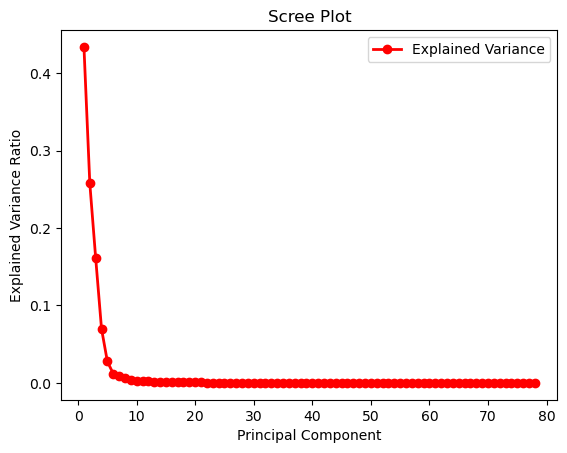

Principal Component 1: Cumulative Explained Variance = 0.4339
Principal Component 2: Cumulative Explained Variance = 0.6916
Principal Component 3: Cumulative Explained Variance = 0.8532
Principal Component 4: Cumulative Explained Variance = 0.9231
Principal Component 5: Cumulative Explained Variance = 0.9508
Principal Component 6: Cumulative Explained Variance = 0.9628
Principal Component 7: Cumulative Explained Variance = 0.9713
Principal Component 8: Cumulative Explained Variance = 0.9773
Principal Component 9: Cumulative Explained Variance = 0.9814
Principal Component 10: Cumulative Explained Variance = 0.9836
Principal Component 11: Cumulative Explained Variance = 0.9856
Principal Component 12: Cumulative Explained Variance = 0.9875
Principal Component 13: Cumulative Explained Variance = 0.9891
Principal Component 14: Cumulative Explained Variance = 0.9905
Principal Component 15: Cumulative Explained Variance = 0.9917
Principal Component 16: Cumulative Explained Variance = 0.9927
P

In [83]:
# PCA Scree plot and explained variance
X = data_class.drop('Average score (log)', axis=1)  
y = data_class['Average score (log)'] 

# Perform PCA
pca = PCA()
pca.fit(X)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot scree plot with cumulative explained variance
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'ro-', linewidth=2, label='Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print cumulative explained variance values
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"Principal Component {i+1}: Cumulative Explained Variance = {ratio:.4f}")


In [8]:
# PCA eigenvalues
X = data_class.drop('Average score (log)', axis=1)  
y = data_class['Average score (log)'] 

# Perform PCA
pca = PCA()
pca.fit(X)

eigenvalues = pca.explained_variance_

# Print eigenvalues for each component
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Principal Component {i+1}: Eigenvalue = {eigenvalue:.4f}")


Principal Component 1: Eigenvalue = 325.1042
Principal Component 2: Eigenvalue = 193.0870
Principal Component 3: Eigenvalue = 121.0389
Principal Component 4: Eigenvalue = 52.4045
Principal Component 5: Eigenvalue = 20.7305
Principal Component 6: Eigenvalue = 8.9910
Principal Component 7: Eigenvalue = 6.3759
Principal Component 8: Eigenvalue = 4.5045
Principal Component 9: Eigenvalue = 3.0582
Principal Component 10: Eigenvalue = 1.6603
Principal Component 11: Eigenvalue = 1.4852
Principal Component 12: Eigenvalue = 1.4455
Principal Component 13: Eigenvalue = 1.2093
Principal Component 14: Eigenvalue = 0.9988
Principal Component 15: Eigenvalue = 0.9024
Principal Component 16: Eigenvalue = 0.7663
Principal Component 17: Eigenvalue = 0.6190
Principal Component 18: Eigenvalue = 0.5628
Principal Component 19: Eigenvalue = 0.5187
Principal Component 20: Eigenvalue = 0.4686
Principal Component 21: Eigenvalue = 0.4515
Principal Component 22: Eigenvalue = 0.3754
Principal Component 23: Eigenvalu

/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)


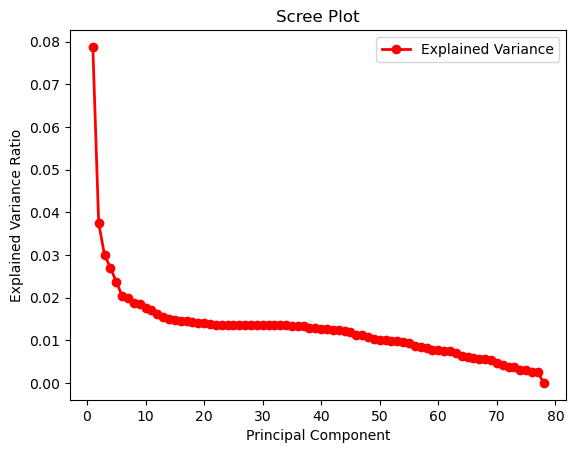

Principal Component 1: Cumulative Explained Variance = 0.0788
Principal Component 2: Cumulative Explained Variance = 0.1162
Principal Component 3: Cumulative Explained Variance = 0.1462
Principal Component 4: Cumulative Explained Variance = 0.1733
Principal Component 5: Cumulative Explained Variance = 0.1970
Principal Component 6: Cumulative Explained Variance = 0.2174
Principal Component 7: Cumulative Explained Variance = 0.2372
Principal Component 8: Cumulative Explained Variance = 0.2561
Principal Component 9: Cumulative Explained Variance = 0.2746
Principal Component 10: Cumulative Explained Variance = 0.2922
Principal Component 11: Cumulative Explained Variance = 0.3093
Principal Component 12: Cumulative Explained Variance = 0.3255
Principal Component 13: Cumulative Explained Variance = 0.3409
Principal Component 14: Cumulative Explained Variance = 0.3557
Principal Component 15: Cumulative Explained Variance = 0.3705
Principal Component 16: Cumulative Explained Variance = 0.3851
P

In [9]:
# KPCA screeplot and explained variance
X = data_class.drop('Average score (log)', axis=1)  
y = data_class['Average score (log)'] 

# Perform Kernel PCA
kpca = KernelPCA(n_components=85, kernel='rbf')
X_kpca = kpca.fit_transform(X)

# Compute the eigenvalues of the kernel matrix
eigenvalues = kpca.lambdas_

# Compute the explained variance ratio
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratio and cumulative explained variance
# Plot scree plot with cumulative explained variance
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'ro-', linewidth=2, label='Explained Variance')
plt.title('KPCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"Principal Component {i+1}: Cumulative Explained Variance = {ratio:.4f}")


In [10]:
# KPCA eigenvalues
X = data_class.drop('Average score (log)', axis=1)  
y = data_class['Average score (log)'] 

# Perform Kernel PCA
kpca = KernelPCA(n_components=None, kernel='rbf')
X_kpca = kpca.fit_transform(X)

# Get eigenvalues
eigenvalues = kpca.lambdas_

# Print eigenvalues larger than 0.99
eigenvalues_above_threshold = eigenvalues[eigenvalues > 0.99]
for i, eigenvalue in enumerate(eigenvalues_above_threshold):
    print(f"Eigenvalue {i+1}: {eigenvalue:.4f}")


Eigenvalue 1: 5.7873
Eigenvalue 2: 2.7512
Eigenvalue 3: 2.2024
Eigenvalue 4: 1.9873
Eigenvalue 5: 1.7423
Eigenvalue 6: 1.4989
Eigenvalue 7: 1.4562
Eigenvalue 8: 1.3841
Eigenvalue 9: 1.3650
Eigenvalue 10: 1.2864
Eigenvalue 11: 1.2619
Eigenvalue 12: 1.1837
Eigenvalue 13: 1.1312
Eigenvalue 14: 1.0934
Eigenvalue 15: 1.0831
Eigenvalue 16: 1.0750
Eigenvalue 17: 1.0609
Eigenvalue 18: 1.0488
Eigenvalue 19: 1.0349
Eigenvalue 20: 1.0244
Eigenvalue 21: 1.0144
Eigenvalue 22: 1.0019
Eigenvalue 23: 1.0008
Eigenvalue 24: 1.0004
Eigenvalue 25: 1.0002
Eigenvalue 26: 1.0000
Eigenvalue 27: 1.0000
Eigenvalue 28: 1.0000
Eigenvalue 29: 1.0000
Eigenvalue 30: 0.9998
Eigenvalue 31: 0.9995
Eigenvalue 32: 0.9993
Eigenvalue 33: 0.9983
Eigenvalue 34: 0.9926


/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)


In [107]:
#Base SVM
# Split the dataset into features (X) and target (y)
X = data_class.drop('Average score (log)', axis=1)
y = data_class['Average score (log)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}

# Create an SVM classifier
svm = SVC()

# Perform grid search to find the best hyperparameters
cv = KFold(n_splits=10)
grid_search = GridSearchCV(svm, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_C = best_params['C']
best_gamma = best_params['gamma']
best_kernel = best_params['kernel']

# Train the SVM classifier with the best hyperparameters
svm.set_params(C=best_C, gamma=best_gamma, kernel=best_kernel)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_KPCS = svm.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_KPCS)

print("Support Vector Machine Classification Results:")
print(f"Best C: {best_C}")
print(f"Best Gamma: {best_gamma}")
print(f"Best Kernel: {best_kernel}")
print(f"Accuracy: {accuracy:.4f}")

# Calculate the confusion matrix
confusion_mat_KPCS = confusion_matrix(y_test, y_pred_KPCS)

# Calculate precision, recall, F1-score, and support
classification_rep_KPCS = classification_report(y_test, y_pred_KPCS)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat_KPCS)

# Print precision, recall, F1-score, and support
print("Classification Report:")
print(classification_rep_KPCS)


Support Vector Machine Classification Results:
Best C: 1
Best Gamma: 0.01
Best Kernel: linear
Accuracy: 0.5000
Confusion Matrix:
[[1 2 2]
 [2 5 1]
 [0 1 2]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.33      0.20      0.25         5
         2.0       0.62      0.62      0.62         8
         3.0       0.40      0.67      0.50         3

    accuracy                           0.50        16
   macro avg       0.45      0.50      0.46        16
weighted avg       0.49      0.50      0.48        16



In [51]:
# KNN base
# Split the dataset into features (X) and target (y)
X = data_class.drop('Average score (log)', axis=1)
y = data_class['Average score (log)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a pipeline with KNN classifier
pipeline = Pipeline([
    ('knn', knn)
])

# Perform grid search to find the best hyperparameters
cv = KFold(n_splits=10)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_n_neighbors = best_params['knn__n_neighbors']
best_weights = best_params['knn__weights']
best_p = best_params['knn__p']

# Set the best hyperparameters to the KNN classifier
knn.set_params(n_neighbors=best_n_neighbors, weights=best_weights, p=best_p)

# Fit the KNN classifier
score = knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy_KKNN = accuracy_score(y_test, y_pred)

print("K-Nearest Neighbors Classification Results:")
print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best weights: {best_weights}")
print(f"Best p: {best_p}")
print(f"Accuracy: {accuracy_KKNN:.4f}")

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, F1-score, and support
classification_rep = classification_report(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Print precision, recall, F1-score, and support
print("Classification Report:")
print(classification_rep)


/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K-Nearest Neighbors Classification Results:
Best n_neighbors: 7
Best weights: distance
Best p: 2
Accuracy: 0.5625
Confusion Matrix:
[[2 0 3]
 [1 6 1]
 [0 2 1]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.67      0.40      0.50         5
         2.0       0.75      0.75      0.75         8
         3.0       0.20      0.33      0.25         3

    accuracy                           0.56        16
   macro avg       0.54      0.49      0.50        16
weighted avg       0.62      0.56      0.58        16



In [101]:
#SVM PCA1
# Split the dataset into features (X) and target (y)
X = data_class.drop('Average score (log)', axis=1)
y = data_class['Average score (log)']

# Perform PCA with 6 components
n_components = 6
pca = PCA(n_components=n_components)
X_PCS1 = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_PCS1, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10],
    'svc__gamma': [0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'poly', 'rbf']
}

# Create an SVM classifier
svc = SVC()

# Create a pipeline with SVM classifier
pipeline = Pipeline([
    ('svc', svc)
])

# Perform grid search to find the best hyperparameters
cv = KFold(n_splits=10)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_C = best_params['svc__C']
best_gamma = best_params['svc__gamma']
best_kernel = best_params['svc__kernel']

# Set the best hyperparameters to the SVM classifier
svc.set_params(C=best_C, gamma=best_gamma, kernel=best_kernel)

# Fit the SVM classifier
PCS1 = svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_PCS1 = svc.predict(X_test)

# Calculate the accuracy score
accuracy_PCS1 = accuracy_score(y_test, y_pred_PCS1)

print("Support Vector Machine Classification Results:")
print(f"Best C: {best_C}")
print(f"Best Gamma: {best_gamma}")
print(f"Best Kernel: {best_kernel}")
print(f"Accuracy: {accuracy_PCS1:.4f}")

from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
confusion_mat_PCS1 = confusion_matrix(y_test, y_pred_PCS1)

# Calculate precision, recall, F1-score, and support
classification_rep_PCS1 = classification_report(y_test, y_pred_PCS1)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat_PCS1)

# Print precision, recall, F1-score, and support
print("Classification Report:")
print(classification_rep_PCS1)



Support Vector Machine Classification Results:
Best C: 1
Best Gamma: 0.01
Best Kernel: linear
Accuracy: 0.3125
Confusion Matrix:
[[0 2 3]
 [2 5 1]
 [2 1 0]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.62      0.62      0.62         8
         3.0       0.00      0.00      0.00         3

    accuracy                           0.31        16
   macro avg       0.21      0.21      0.21        16
weighted avg       0.31      0.31      0.31        16



In [100]:
#SVM PCA2
# Split the dataset into features (X) and target (y)
X = data_class.drop('Average score (log)', axis=1)
y = data_class['Average score (log)']

# Perform PCA with 13 components
n_components_PCA2 = 13
pca = PCA(n_components=n_components_PCA2)
X_PCS2 = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_PCS2, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10],
    'svc__gamma': [0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'poly', 'rbf']
}

# Create an SVM classifier
svc = SVC()

# Create a pipeline with SVM classifier
pipeline = Pipeline([
    ('svc', svc)
])

# Perform grid search to find the best hyperparameters
cv = KFold(n_splits=10)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_C = best_params['svc__C']
best_gamma = best_params['svc__gamma']
best_kernel = best_params['svc__kernel']

# Set the best hyperparameters to the SVM classifier
svc.set_params(C=best_C, gamma=best_gamma, kernel=best_kernel)

# Fit the SVM classifier
PCS2 = svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_PCS2 = svc.predict(X_test)

# Calculate the accuracy score
accuracy_PCS2 = accuracy_score(y_test, y_pred_PCS2)

print("Support Vector Machine Classification Results:")
print(f"Best C: {best_C}")
print(f"Best Gamma: {best_gamma}")
print(f"Best Kernel: {best_kernel}")
print(f"Accuracy: {accuracy_PCS2:.4f}")

# Calculate the confusion matrix
confusion_mat_PCS2 = confusion_matrix(y_test, y_pred_PCS2)

# Calculate precision, recall, F1-score, and support
classification_rep_PCS2 = classification_report(y_test, y_pred_PCS2)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat_PCS2)

# Print precision, recall, F1-score, and support
print("Classification Report:")
print(classification_rep_PCS2)


Support Vector Machine Classification Results:
Best C: 10
Best Gamma: 0.01
Best Kernel: linear
Accuracy: 0.5625
Confusion Matrix:
[[1 2 2]
 [1 6 1]
 [0 1 2]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.50      0.20      0.29         5
         2.0       0.67      0.75      0.71         8
         3.0       0.40      0.67      0.50         3

    accuracy                           0.56        16
   macro avg       0.52      0.54      0.50        16
weighted avg       0.56      0.56      0.54        16



In [109]:
# SVM KPCA1
# Split the dataset into features (X) and target (y)
X = data_class.drop('Average score (log)', axis=1)
y = data_class['Average score (log)']

# Perform Kernel PCA with 6 components
kpca = KernelPCA(n_components=6, kernel='rbf')
X_KPCS1 = kpca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_KPCS1, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10],
    'svc__gamma': [0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'poly', 'rbf']
}

# Create an SVM classifier
svc = SVC()

# Create a pipeline with SVM classifier
pipeline = Pipeline([
    ('svc', svc)
])

# Perform grid search to find the best hyperparameters
cv = KFold(n_splits=10)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_C = best_params['svc__C']
best_gamma = best_params['svc__gamma']
best_kernel = best_params['svc__kernel']

# Set the best hyperparameters to the SVM classifier
svc.set_params(C=best_C, gamma=best_gamma, kernel=best_kernel)

# Fit the SVM classifier
KPCS1 = svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_KPCS1 = svc.predict(X_test)

# Calculate the accuracy score
accuracy_KPCS1 = accuracy_score(y_test, y_pred_KPCS1)

print("Support Vector Machine Classification Results:")
print(f"Best C: {best_C}")
print(f"Best Gamma: {best_gamma}")
print(f"Best Kernel: {best_kernel}")
print(f"Accuracy: {accuracy_KPCS1:.4f}")

# Calculate the confusion matrix
confusion_mat_KPCS1 = confusion_matrix(y_test, y_pred_KPCS1)

# Calculate precision, recall, F1-score, and support
classification_rep_KPCS1 = classification_report(y_test, y_pred_KPCS1)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat_KPCS1)

# Print precision, recall, F1-score, and support
print("Classification Report:")
print(classification_rep_KPCS1)


Support Vector Machine Classification Results:
Best C: 0.01
Best Gamma: 0.01
Best Kernel: linear
Accuracy: 0.5000
Confusion Matrix:
[[0 5 0]
 [0 8 0]
 [0 3 0]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.50      1.00      0.67         8
         3.0       0.00      0.00      0.00         3

    accuracy                           0.50        16
   macro avg       0.17      0.33      0.22        16
weighted avg       0.25      0.50      0.33        16



/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [110]:
#SVM KPCA2
# Split the dataset into features (X) and target (y)
X = data_class.drop('Average score (log)', axis=1)
y = data_class['Average score (log)']

# Perform Kernel PCA with 29 components
kpca = KernelPCA(n_components=29, kernel='rbf')
X_KPCS2 = kpca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_KPCS2, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10],
    'svc__gamma': [0.01, 0.1, 1, 10],
    'svc__kernel': ['linear', 'poly', 'rbf']
}

# Create an SVM classifier
svc = SVC()

# Create a pipeline with SVM classifier
pipeline = Pipeline([
    ('svc', svc)
])

# Perform grid search to find the best hyperparameters
cv = KFold(n_splits=10)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_C = best_params['svc__C']
best_gamma = best_params['svc__gamma']
best_kernel = best_params['svc__kernel']

# Set the best hyperparameters to the SVM classifier
svc.set_params(C=best_C, gamma=best_gamma, kernel=best_kernel)

# Fit the SVM classifier
KPCS2 = svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_KPCS2 = svc.predict(X_test)

# Calculate the accuracy score
accuracy_KPCS2 = accuracy_score(y_test, y_pred_KPCS2)

print("Support Vector Machine Classification Results:")
print(f"Best C: {best_C}")
print(f"Best Gamma: {best_gamma}")
print(f"Best Kernel: {best_kernel}")
print(f"Accuracy: {accuracy_KPCS2:.4f}")

# Calculate the confusion matrix
confusion_mat_KPCS2 = confusion_matrix(y_test, y_pred_KPCS2)

classification_rep_KPCS2 = classification_report(y_test, y_pred_KPCS2)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat_KPCS2)

# Print precision, recall, F1-score, and support
print("Classification Report:")
print(classification_rep_KPCS2)


Support Vector Machine Classification Results:
Best C: 10
Best Gamma: 0.01
Best Kernel: linear
Accuracy: 0.5000
Confusion Matrix:
[[3 1 1]
 [0 4 4]
 [0 2 1]]
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.60      0.75         5
         2.0       0.57      0.50      0.53         8
         3.0       0.17      0.33      0.22         3

    accuracy                           0.50        16
   macro avg       0.58      0.48      0.50        16
weighted avg       0.63      0.50      0.54        16



In [105]:
#PCA1-KNN
# Split the dataset into features (X) and target (y)
X = data_class.drop('Average score (log)', axis=1)
y = data_class['Average score (log)']

# Perform PCA with 6 components
n_components = 6
pca = PCA(n_components=n_components)
X_PKNN1 = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_PKNN1, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a pipeline with KNN classifier
pipeline = Pipeline([
    ('knn', knn)
])

# Perform grid search to find the best hyperparameters
cv = KFold(n_splits=10)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_n_neighbors = best_params['knn__n_neighbors']
best_weights = best_params['knn__weights']
best_p = best_params['knn__p']

# Set the best hyperparameters to the KNN classifier
knn.set_params(n_neighbors=best_n_neighbors, weights=best_weights, p=best_p)

# Fit the KNN classifier
PKNN1 = knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_PKNN1 = knn.predict(X_test)

# Calculate the accuracy score
accuracy_PKNN1 = accuracy_score(y_test, y_pred_PKNN1)

print("K-Nearest Neighbors Classification Results:")
print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best weights: {best_weights}")
print(f"Best p: {best_p}")
print(f"Accuracy: {accuracy_PKNN1:.4f}")

# Calculate the confusion matrix
confusion_mat_PKNN1 = confusion_matrix(y_test, y_pred_PKNN1)

# Calculate precision, recall, F1-score, and support
classification_rep_PKNN1 = classification_report(y_test, y_pred_PKNN1)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat_PKNN1)

# Print precision, recall, F1-score, and support
print("Classification Report:")
print(classification_rep_PKNN1)


/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K-Nearest Neighbors Classification Results:
Best n_neighbors: 5
Best weights: uniform
Best p: 2
Accuracy: 0.5000
Confusion Matrix:
[[3 1 1]
 [4 4 0]
 [1 1 1]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.38      0.60      0.46         5
         2.0       0.67      0.50      0.57         8
         3.0       0.50      0.33      0.40         3

    accuracy                           0.50        16
   macro avg       0.51      0.48      0.48        16
weighted avg       0.54      0.50      0.50        16



/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [108]:
#PCA2-KNN
# Split the dataset into features (X) and target (y)
X = data_class.drop('Average score (log)', axis=1)
y = data_class['Average score (log)']

# Perform PCA with 13 components
n_components_PCA2 = 13
pca = PCA(n_components=n_components_PCA2)
X_PKNN2 = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_PKNN2, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a pipeline with KNN classifier
pipeline = Pipeline([
    ('knn', knn)
])

# Perform grid search to find the best hyperparameters
cv = KFold(n_splits=10)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_n_neighbors = best_params['knn__n_neighbors']
best_weights = best_params['knn__weights']
best_p = best_params['knn__p']

# Set the best hyperparameters to the KNN classifier
knn.set_params(n_neighbors=best_n_neighbors, weights=best_weights, p=best_p)

# Fit the KNN classifier
PKNN2 = knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_PKNN2 = knn.predict(X_test)

# Calculate the accuracy score
accuracy_PKNN2 = accuracy_score(y_test, y_pred_PKNN2)

print("K-Nearest Neighbors Classification Results:")
print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best weights: {best_weights}")
print(f"Best p: {best_p}")
print(f"Accuracy: {accuracy_PKNN2:.4f}")

# Calculate the confusion matrix
confusion_mat_PKNN2 = confusion_matrix(y_test, y_pred_PKNN2)

# Calculate precision, recall, F1-score, and support
classification_rep_PKNN2 = classification_report(y_test, y_pred_PKNN2)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat_PKNN2)

# Print precision, recall, F1-score, and support
print("Classification Report:")
print(classification_rep_PKNN2)


/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K-Nearest Neighbors Classification Results:
Best n_neighbors: 7
Best weights: distance
Best p: 2
Accuracy: 0.5625
Confusion Matrix:
[[2 0 3]
 [1 6 1]
 [0 2 1]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.67      0.40      0.50         5
         2.0       0.75      0.75      0.75         8
         3.0       0.20      0.33      0.25         3

    accuracy                           0.56        16
   macro avg       0.54      0.49      0.50        16
weighted avg       0.62      0.56      0.58        16



/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

In [95]:
#KNN KPCA1
# Split the dataset into features (X) and target (y)
X = data_class.drop('Average score (log)', axis=1)
y = data_class['Average score (log)']

# Perform Kernel PCA with 6 components
kpca = KernelPCA(n_components=6, kernel='rbf')
X_KKNN1 = kpca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_KKNN1, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a pipeline with KNN classifier
pipeline = Pipeline([
    ('knn', knn)
])

# Perform grid search to find the best hyperparameters
cv = KFold(n_splits=10)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_n_neighbors = best_params['knn__n_neighbors']
best_weights = best_params['knn__weights']
best_p = best_params['knn__p']

# Set the best hyperparameters to the KNN classifier
knn.set_params(n_neighbors=best_n_neighbors, weights=best_weights, p=best_p)

# Fit the KNN classifier
KKNN1 = knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_KKNN1 = knn.predict(X_test)

# Calculate the accuracy score
accuracy_KKNN1 = accuracy_score(y_test, y_pred_KKNN1)

print("K-Nearest Neighbors Classification Results:")
print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best weights: {best_weights}")
print(f"Best p: {best_p}")
print(f"Accuracy: {accuracy_KKNN1:.4f}")

# Calculate the confusion matrix
confusion_mat_KKNN1 = confusion_matrix(y_test, y_pred_KKNN1)

# Calculate precision, recall, F1-score, and support
classification_rep_KKNN1 = classification_report(y_test, y_pred_KKNN1)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat_KKNN1)

# Print precision, recall, F1-score, and support
print("Classification Report:")
print(classification_rep_KKNN1)


/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K-Nearest Neighbors Classification Results:
Best n_neighbors: 7
Best weights: uniform
Best p: 1
Accuracy: 0.5000
Confusion Matrix:
[[2 2 1]
 [2 5 1]
 [0 2 1]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.50      0.40      0.44         5
         2.0       0.56      0.62      0.59         8
         3.0       0.33      0.33      0.33         3

    accuracy                           0.50        16
   macro avg       0.46      0.45      0.46        16
weighted avg       0.50      0.50      0.50        16



/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

In [94]:
#KNN KPCA2
# Split the dataset into features (X) and target (y)
X = data_class.drop('Average score (log)', axis=1)
y = data_class['Average score (log)']

# Perform Kernel PCA with 29 components
kpca = KernelPCA(n_components=29, kernel='rbf')
X_KKNN2 = kpca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_KKNN2, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a pipeline with KNN classifier
pipeline = Pipeline([
    ('knn', knn)
])

# Perform grid search to find the best hyperparameters
cv = KFold(n_splits=10)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_n_neighbors = best_params['knn__n_neighbors']
best_weights = best_params['knn__weights']
best_p = best_params['knn__p']

# Set the best hyperparameters to the KNN classifier
knn.set_params(n_neighbors=best_n_neighbors, weights=best_weights, p=best_p)

# Fit the KNN classifier
KKNN2 = knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_KKNN2 = knn.predict(X_test)

# Calculate the accuracy score
accuracy_KKNN2 = accuracy_score(y_test, y_pred_KKNN2)

print("K-Nearest Neighbors Classification Results:")
print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Best weights: {best_weights}")
print(f"Best p: {best_p}")
print(f"Accuracy: {accuracy_KKNN2:.4f}")

# Calculate the confusion matrix
confusion_mat_KKNN2 = confusion_matrix(y_test, y_pred_KKNN2)

# Calculate precision, recall, F1-score, and support
classification_rep_KKNN2 = classification_report(y_test, y_pred_KKNN2)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat_KKNN2)

# Print precision, recall, F1-score, and support
print("Classification Report:")
print(classification_rep_KKNN2)


/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

K-Nearest Neighbors Classification Results:
Best n_neighbors: 5
Best weights: uniform
Best p: 2
Accuracy: 0.5000
Confusion Matrix:
[[4 1 0]
 [4 4 0]
 [1 2 0]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.44      0.80      0.57         5
         2.0       0.57      0.50      0.53         8
         3.0       0.00      0.00      0.00         3

    accuracy                           0.50        16
   macro avg       0.34      0.43      0.37        16
weighted avg       0.42      0.50      0.45        16



/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/peterhendriks/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1

In [22]:
# Find the number of outliers
# Calculate modified z-scores for each observation
median = np.median(data_class, axis=0)
mad = np.median(np.abs(data_class - median), axis=0)
modified_z_scores = 0.6745 * (data_class - median) / mad

num_outliers = ((modified_z_scores > 3.5) | (modified_z_scores < -3.5)).sum().sum()
print(f"Number of outliers: {num_outliers}")


Number of outliers: 440


There are 166 strong correlations in the data.


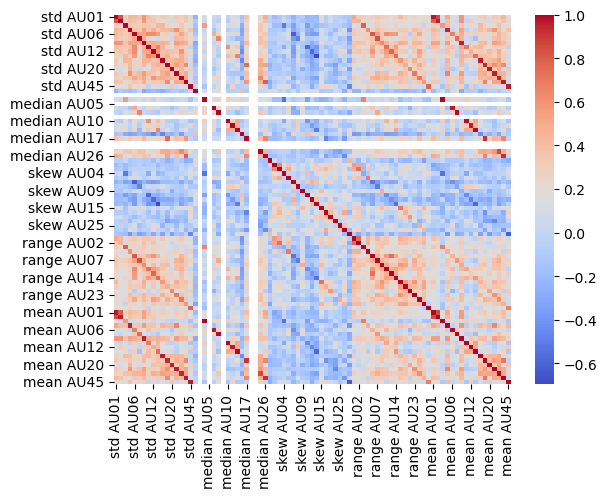

In [25]:
# Heat map
corr_matrix = X.corr()

sns.heatmap(corr_matrix, cmap='coolwarm')

strong_corr_count = ((corr_matrix >= 0.7) | (corr_matrix <= -0.7)).sum().sum()

print(f"There are {strong_corr_count} strong correlations in the data.")
